### 0. Imports

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_ta as ta
import datetime
from xgboost import XGBRegressor, plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1. Read data into Dataframe

In [154]:
df = pd.read_csv('../../long_short_local/raw_data/cleaned_data.csv')

### 2. Prepare data

In [156]:
df['Date'] = pd.to_datetime(df['Date'].str[:10])

In [158]:
# add MA and RSI
test_df = df[['Date', 'TEL_BIO']]

In [159]:
sma10 = pd.DataFrame(ta.sma(test_df["TEL_BIO"], length=10))

In [160]:
tel_bio_df = pd.concat([test_df, sma10], axis=1, ignore_index=False)

In [166]:
tel_bio_df.set_index('Date', inplace=True)

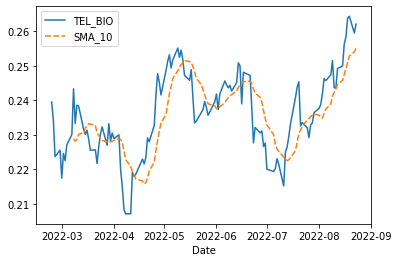

In [171]:
sns.lineplot(data=tel_bio_df);

In [21]:
# convert 'Date' column to datetime values
df['Date'] = pd.to_datetime(df['Date'].str[:10])

In [5]:
# split into 'train' and 'test' data
split_date = df['Date'][41]
df.set_index('Date', inplace=True)
train_df = df.loc[df.index <= split_date].copy()
test_df = df.loc[df.index > split_date].copy()

In [25]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.weekofyear

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [26]:
X_train, y_train = create_features(train_df, label='number')

/var/folders/9c/wqkq2b6j16l2hg0gd5_m7sj00000gn/T/ipykernel_9718/3447032744.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


KeyError: 'number'

In [14]:
X_test, y_test = create_features(test_df, label='number')

KeyError: 'Date'

In [7]:
# build first model
model = XGBRegressor(n_estimators=1000)

In [ ]:
model.fit()